<a href="https://colab.research.google.com/github/MonitSharma/Numerical-Linear-Algebra/blob/main/Scalars%2C_Vectors%2C_Matrices_and_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy

import numpy as np
import torch

# Introduction

This section offers a gentle introduction to the most essential concepts and tools from linear algebra, starting from scalar arithmetic and ramping up to matrix multiplication using PyTorch.

## Scalars, Vectors, Matrices and Tensors

Let's start with some basic definition

![](https://github.com/akhilvasvani/Linear-Algebra-Basics/blob/master/Chapters/2.01%20Scalars%2C%20Vectors%2C%20Matrices%20and%20Tensors/images/scalar-vector-matrix-tensor.png)




*Difference between a scalar, a vector , a matrix and a tensor*

<li> A scalar is a single number or a mtrix with single entry.

<li> A vector is a 1-d array of numbers. Another way to think of vectors is identifying points in space with each element giving the coordinate along a different axis.

$$ {x} =\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}$$


<li> A matrix is a 2-D array where each element is identified by two indices (ROW then COLUMN).

$$ {A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix} $$


<li> A tensor is a $n$-dimensional array with $n>2$


-------

1. scalars are written in lowercase and italics. For instance: $n$

2. vectors are written in lowercase, italics and bold type. For instance: $x$

3. matrices are written in uppercase, italics and bold. For instance: $X$ 


## Scalars

Most everyday mathematics consists of manipulating numbers one at a time. Formally, we call these values *scalars*. 

For example, the temperature in Palo Alto is a balmy $72$ degrees Fahrenheit. If you wanted to convert the temperature to Celsius, you would evaluate the expression 

$$c = \frac{5}{9}(f - 32)$$

setting $f$ to $72$. In this equation, the values $5$, $9$, and $32$ are constant scalars. The variables $c$ and $f$ in general represent unknown scalars.

We denote scalars by ordinary lower-cased letters (e.g., $x$, $y$, and $z$) and the space of all (continuous) *real-valued* scalars by $\mathbb{R}$. For expedience, we will skip past rigorous definitions of *spaces*: just remember that the expression $x \in \mathbb{R}$ is a formal way to say that $x$ is a real-valued scalar. The symbol $\in$ (pronounced "in") denotes membership in a set. For example, 

$$x, y \in \{0, 1\}$$

indicates that $x$ and $y$ are variables that can only take values $0$ or $1$.

**Scalars are implemented as tensors that contain only one element.** Below, we assign two scalars and perform the familiar addition, multiplication, division, and exponentiation operations.


In [ ]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

## Vectors

For current purposes, **you can think of a vector as a fixed-length array of scalars.** As with their code counterparts, we call these scalars the *elements* of the vector (synonyms include *entries* and *components*). 

When vectors represent examples from real-world datasets, their values hold some real-world significance. For example, if we were training a model to predict the risk of a loan defaulting, we might associate each applicant with a vector whose components correspond to quantities like their income, length of employment, or number of previous defaults. If we were studying the risk of heart attack, each vector might represent a patient and its components might correspond to their most recent vital signs, cholesterol levels, minutes of exercise per day, etc.

We denote vectors by bold lowercase letters (e.g., $\mathbf{x}$, $\mathbf{y}$, and $\mathbf{z}$). 

Vectors are implemented as $1^{\textrm{st}}$-order tensors. In general, such tensors can have arbitrary lengths, subject to memory limitations. Caution: in Python, as in most programming languages, vector indices start at $0$ (zero-based indexing), whereas in linear algebra, subscripts begin at $1$ (one-based indexing).


In [ ]:
x = torch.arange(3)
x

tensor([0, 1, 2])

We can refer to an element of a vector by using a subscript.
For example, $x_2$ denotes the second element of $\mathbf{x}$.
Since $x_2$ is a scalar, we do not bold it.
By default, we visualize vectors
by stacking their elements vertically.

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\ \vdots  \\x_{n}\end{bmatrix},$$


Here $x_1, \ldots, x_n$ are elements of the vector.
Later on, we will distinguish between such *column vectors*
and *row vectors* whose elements are stacked horizontally.
Recall that [**we access a tensor's elements via indexing.**]


In [ ]:
x[2]

tensor(2)

To indicate that a vector contains $n$ elements,
we write $\mathbf{x} \in \mathbb{R}^n$.
Formally, we call $n$ the *dimensionality* of the vector.
[**In code, this corresponds to the tensor's length**],
accessible via Python's built-in `len` function.


In [ ]:
len(x)

3

We can also access the length via the `shape` attribute.
The shape is a tuple that indicates a tensor's length along each axis.
(**Tensors with just one axis have shapes with just one element.**)


In [ ]:
x.shape

torch.Size([3])

Oftentimes, the word "dimension" gets overloaded to mean both the number of axes and the length along a particular axis. To avoid this confusion, we use *order* to refer to the number of axes and *dimensionality* exclusively to refer to the number of components.

## Matrices

Just as scalars are $0^{\textrm{th}}$-order tensors and vectors are $1^{\textrm{st}}$-order tensors, matrices are $2^{\textrm{nd}}$-order tensors. We denote matrices by bold capital letters (e.g., $\mathbf{X}$, $\mathbf{Y}$, and $\mathbf{Z}$), and represent them in code by tensors with two axes. 

The expression 

$$\mathbf{A} \in \mathbb{R}^{m \times n}$$ 

indicates that a matrix $\mathbf{A}$ contains $m \times n$ real-valued scalars, arranged as $m$ rows and $n$ columns. When $m = n$, we say that a matrix is *square*. Visually, we can illustrate any matrix as a table. To refer to an individual element, we subscript both the row and column indices, e.g., 

$$a_{ij}$$ 

is the value that belongs to $\mathbf{A}$'s $i^{\textrm{th}}$ row and $j^{\textrm{th}}$ column:

$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.$$


In code, we represent a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ by a $2^{\textrm{nd}}$-order tensor with shape ($m$, $n$). **We can convert any appropriately sized $m \times n$ tensor into an $m \times n$ matrix** by passing the desired shape to `reshape`:


In [ ]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

Sometimes we want to flip the axes. When we exchange a matrix's rows and columns, the result is called its *transpose*.

Formally, we signify a matrix $\mathbf{A}$'s transpose by $\mathbf{A}^\top$, and if $\mathbf{B} = \mathbf{A}^\top$, then $b_{ij} = a_{ji}$ for all $i$ and $j$. Thus, the transpose of an $m \times n$ matrix is an $n \times m$ matrix:

$$
\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn}
\end{bmatrix}.
$$

The transpose $A^T$ of the matrix $A$ corresponds to the mirrored axes. If the matrix is a square matrix (same number of columns and rows), we have:

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\
    A_{2,1} & A_{2,2} \\
    A_{3,1} & A_{3,2}
\end{bmatrix}
$$

and its transpose is given by:

$$
{A}^{\text{T}}=
\begin{bmatrix}
    A_{1,1} & A_{2,1} & A_{3,1} \\
    A_{1,2} & A_{2,2} & A_{3,2}
\end{bmatrix}
$$

In code, we can access any **matrix's transpose** as follows:


In [ ]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

[**Symmetric matrices are the subset of square matrices
that are equal to their own transposes:
$\mathbf{A} = \mathbf{A}^\top$.**]
The following matrix is symmetric:

In [ ]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Matrices are useful for representing datasets. Typically, rows correspond to individual records and columns correspond to distinct attributes.

## Tensors

While you can go far in your machine learning journey with only scalars, vectors, and matrices, eventually you may need to work with higher-order **tensors**. Tensors **give us a generic way of describing extensions to $n^{\textrm{th}}$-order arrays.** We call software objects of the *tensor class* "tensors" precisely because they too can have arbitrary numbers of axes.

While it may be confusing to use the word *tensor* for both the mathematical object and its realization in code, our meaning should usually be clear from context. We denote general tensors by capital letters with a special font face (e.g., $\mathsf{X}$, $\mathsf{Y}$, and $\mathsf{Z}$), and their indexing mechanism (e.g., $x_{ijk}$ and $[\mathsf{X}]_{1, 2i-1, 3}$) follows naturally from that of matrices.

Tensors will become more important when we start working with images. Each image arrives as a $3^{\textrm{rd}}$-order tensor with axes corresponding to the height, width, and *channel*. At each spatial location, the intensities of each color (red, green, and blue) are stacked along the channel. Furthermore, a collection of images is represented in code by a $4^{\textrm{th}}$-order tensor, where distinct images are indexed along the first axis. Higher-order tensors are constructed, as were vectors and matrices, by growing the number of shape components.


In [ ]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

## Basic Properties of Tensor Arithmetic

Scalars, vectors, matrices, and higher-order tensors all have some handy properties. For example, elementwise operations produce outputs that have the same shape as their operands.

Matrices can be added if they have the same shape:

$$ A + B = C $$

Each cell of $A$ is added to the corresponding cell of $B$:

$$ {A}_{i,j} + {B}_{i,j} = {C}_{i,j} $$

where $i$ is the row index and $j$ is the column index.

For example:

$$ 
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\
    A_{2,1} & A_{2,2} \\
    A_{3,1} & A_{3,2}
\end{bmatrix} +
\begin{bmatrix}
    B_{1,1} & B_{1,2} \\
    B_{2,1} & B_{2,2} \\
    B_{3,1} & B_{3,2}
\end{bmatrix} =
\begin{bmatrix}
    A_{1,1} + B_{1,1} & A_{1,2} + B_{1,2} \\
    A_{2,1} + B_{2,1} & A_{2,2} + B_{2,2} \\
    A_{3,1} + B_{3,1} & A_{3,2} + B_{3,2}
\end{bmatrix} 
$$

The shapes of $A$, $B$, and $C$ are identical. Let's check that in an example:


In [ ]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

The [**elementwise product of two matrices
is called their *Hadamard product***] (denoted $\odot$).
We can spell out the entries
of the Hadamard product of two matrices
$\mathbf{A}, \mathbf{B} \in \mathbb{R}^{m \times n}$:



$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$


In [ ]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

[**Adding or multiplying a scalar and a tensor**] produces a result
with the same shape as the original tensor.
Here, each element of the tensor is added to (or multiplied by) the scalar.


In [ ]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## Reduction


Often, we wish to calculate [**the sum of a tensor's elements.**]
To express the sum of the elements in a vector $\mathbf{x}$ of length $n$,
we write $\sum_{i=1}^n x_i$. There is a simple function for it:


In [ ]:
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

To express [**sums over the elements of tensors of arbitrary shape**],
we simply sum over all its axes.
For example, the sum of the elements
of an $m \times n$ matrix $\mathbf{A}$
could be written $\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$.

In [ ]:
A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

By default, invoking the sum function
*reduces* a tensor along all of its axes,
eventually producing a scalar.
Our libraries also allow us to [**specify the axes
along which the tensor should be reduced.**]
To sum over all elements along the rows (axis 0),
we specify `axis=0` in `sum`.
Since the input matrix reduces along axis 0
to generate the output vector,
this axis is missing from the shape of the output.


In [ ]:
A.shape, A.sum(axis=0).shape

(torch.Size([2, 3]), torch.Size([2]))

Specifying `axis=1` will reduce the column dimension (axis 1) by summing up elements of all the columns.


In [ ]:
A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

Reducing a matrix along both rows and columns via summation
is equivalent to summing up all the elements of the matrix.


In [ ]:
A.sum(axis=[0, 1]) == A.sum()  # Same as A.sum()

tensor(True)

[**A related quantity is the *mean*, also called the *average*.**]
We calculate the mean by dividing the sum
by the total number of elements.
Because computing the mean is so common,
it gets a dedicated library function
that works analogously to `sum`.


In [ ]:
A.mean(), A.sum() / A.numel()

(tensor(2.5000), tensor(2.5000))

Likewise, the function for calculating the mean
can also reduce a tensor along specific axes.

In [ ]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

# Broadcasting

PyTorch can handle operations on tensors of different shapes. The smaller tensor will be extended to match the shape of the larger one. The advantage is that this is done in C under the hood (like any vectorized operations in PyTorch). In fact, we used broadcasting in the previous example where a scalar was converted to an array of the same shape as $A$.

Here is another generic example:

$$ 
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\
    A_{2,1} & A_{2,2} \\
    A_{3,1} & A_{3,2}
\end{bmatrix} +
\begin{bmatrix}
    B_{1,1} \\
    B_{2,1} \\
    B_{3,1}
\end{bmatrix} 
$$

This is equivalent to:

$$ 
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\
    A_{2,1} & A_{2,2} \\
    A_{3,1} & A_{3,2}
\end{bmatrix} +
\begin{bmatrix}
    B_{1,1} & B_{1,1} \\
    B_{2,1} & B_{2,1} \\
    B_{3,1} & B_{3,1}
\end{bmatrix} =
\begin{bmatrix}
    A_{1,1} + B_{1,1} & A_{1,2} + B_{1,1} \\
    A_{2,1} + B_{2,1} & A_{2,2} + B_{2,1} \\
    A_{3,1} + B_{3,1} & A_{3,2} + B_{3,1}
\end{bmatrix} 
$$

In this example, the $3 \times 1$ tensor is converted to the appropriate shape ($3 \times 2$) by repeating the first column. PyTorch will do this automatically if the shapes can match.




## Non-Reduction Sum
Sometimes it can be useful to **keep the number of axes unchanged** when invoking the function for calculating the sum or mean. This is important when we want to use the broadcasting mechanism.

In [ ]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

(tensor([[ 3.],
         [12.]]),
 torch.Size([2, 1]))

For instance, since `sum_A` keeps its two axes after summing each row,
we can (**divide `A` by `sum_A` with broadcasting**)
to create a matrix where each row sums up to $1$.


In [ ]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.2500, 0.3333, 0.4167]])

# Multiplying Matrices and Vectors

Matrix multiplication is not simply an element-wise product; rather, it involves calculating the sum of the products between the rows of the first matrix and the columns of the second matrix.

**Matrix Dimensions**

For matrix multiplication to be valid, the number of columns in the first matrix must equal the number of rows in the second matrix. If the first matrix has dimensions $(m \times n)$, then the second matrix must have dimensions $(n \times x)$. The resulting matrix will have dimensions $(m \times x)$.

**Dot Products**

Up to this point, we have performed element-wise operations, sums, and averages. If these were the only operations available, linear algebra would not merit its own section. Fortunately, there are more interesting operations, one of which is the dot product.

Given two vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^d$, their *dot product* $\mathbf{x}^\top \mathbf{y}$ (also known as the *inner product*, $\langle \mathbf{x}, \mathbf{y} \rangle$) is defined as:

$$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i.$$

**Example: Matrix-Vector Multiplication**

Let's consider the multiplication of a matrix and a vector:

$$ \mathbf{A} \times \mathbf{b} = \mathbf{C} $$

where 

$$ 
\mathbf{A} = 
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix} 
$$ 

and 

$$ 
\mathbf{b} = 
\begin{bmatrix}
    2 \\
    4
\end{bmatrix}. 
$$

Using the multiplication formula, we have:

$$ 
\begin{align*}
\mathbf{A} \times \mathbf{b} &= 
\begin{bmatrix}
    A_{1,1} & A_{1,2} \\
    A_{2,1} & A_{2,2} \\
    A_{3,1} & A_{3,2}
\end{bmatrix} \times 
\begin{bmatrix}
    B_{1,1} \\
    B_{2,1}
\end{bmatrix} \\
&= 
\begin{bmatrix}
    A_{1,1}B_{1,1} + A_{1,2}B_{2,1} \\
    A_{2,1}B_{1,1} + A_{2,2}B_{2,1} \\
    A_{3,1}B_{1,1} + A_{3,2}B_{2,1}
\end{bmatrix}
\end{align*} 
$$

Substituting the values, we get:

$$ 
\begin{align*}
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix} \times 
\begin{bmatrix}
    2 \\
    4
\end{bmatrix} &= 
\begin{bmatrix}
    1 \times 2 + 2 \times 4 \\
    3 \times 2 + 4 \times 4 \\
    5 \times 2 + 6 \times 4
\end{bmatrix} \\
&= 
\begin{bmatrix}
    10 \\
    22 \\
    34
\end{bmatrix}
\end{align*} 
$$

**Checking Dimensions**

It is good practice to check the dimensions of the matrices involved. In this example, the shape of $\mathbf{A}$ is $(3 \times 2)$ and the shape of $\mathbf{b}$ is $(2 \times 1)$. Consequently, the dimensions of $\mathbf{C}$ will be $(3 \times 1)$.


In [ ]:
y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

array([[10],
       [22],
       [34]])

Equivalently, (**we can calculate the dot product of two vectors
by performing an elementwise multiplication followed by a sum:**)

In [ ]:
torch.sum(x * y)

tensor(6.)

Dot products are powerful tools used in various applications. For instance, consider a vector $\mathbf{x} \in \mathbb{R}^n$ representing a set of values, and another vector $\mathbf{w} \in \mathbb{R}^n$ representing a set of weights. The weighted sum of the values in $\mathbf{x}$ according to the weights in $\mathbf{w}$ can be computed using the dot product:

$$ \mathbf{x}^\top \mathbf{w}. $$

When the weights are nonnegative and sum to 1 (i.e., $\sum_{i=1}^{n} w_i = 1$), the dot product gives us a *weighted average*. Additionally, when two vectors are normalized to unit length, their dot product reflects the cosine of the angle between them. We will discuss the concept of *length* in more detail later.

## Matrix-Vector Products

Now that we understand dot products, let’s explore how to multiply an $m \times n$ matrix $\mathbf{A}$ by an $n$-dimensional vector $\mathbf{x}$. 

We can visualize the matrix $\mathbf{A}$ as a collection of its row vectors:

$$
\mathbf{A} =
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_{m}
\end{bmatrix},
$$

where each $\mathbf{a}^\top_{i} \in \mathbb{R}^n$ represents the $i^{\textrm{th}}$ row of the matrix.

When we multiply the matrix $\mathbf{A}$ by the vector $\mathbf{x}$, the result is a new column vector $\mathbf{C}$ with length $m$. Each element of $\mathbf{C}$ is the dot product of a row vector from $\mathbf{A}$ with the vector $\mathbf{x}$:

$$
\mathbf{C} = \mathbf{A}\mathbf{x} = 
\begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{x} \\
\mathbf{a}^\top_{2} \mathbf{x} \\
\vdots \\
\mathbf{a}^\top_{m} \mathbf{x}
\end{bmatrix}.
$$

In essence, multiplying by the matrix $\mathbf{A}$ transforms the vector $\mathbf{x}$ from $\mathbb{R}^{n}$ into a new vector in $\mathbb{R}^{m}$. This transformation is useful in many scenarios, such as representing rotations with specific square matrices. Additionally, matrix-vector products are fundamental in neural networks, where they calculate the outputs of each layer based on the previous layer's outputs.


To express a matrix--vector product in code,
we use the `mv` function.
Note that the column dimension of `A`
(its length along axis 1)
must be the same as the dimension of `x` (its length).
Python has a convenience operator `@`
that can execute both matrix--vector
and matrix--matrix products
(depending on its arguments).
Thus we can write `A@x`.


In [ ]:
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

## Matrix-Matrix Multiplication

Once you understand dot products and matrix-vector products, matrix-matrix multiplication becomes straightforward.

Consider two matrices: 
- $\mathbf{A} \in \mathbb{R}^{n \times k}$ 
- $\mathbf{B} \in \mathbb{R}^{k \times m}$.

These matrices can be represented as follows:

$$
\mathbf{A} = 
\begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}, \quad
\mathbf{B} = 
\begin{bmatrix}
    b_{11} & b_{12} & \cdots & b_{1m} \\
    b_{21} & b_{22} & \cdots & b_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}.
$$

Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$ represent the $i^{\textrm{th}}$ row vector of $\mathbf{A}$, and $\mathbf{b}_{j} \in \mathbb{R}^k$ represent the $j^{\textrm{th}}$ column vector of $\mathbf{B}$:

$$
\mathbf{A} = 
\begin{bmatrix}
    \mathbf{a}^\top_{1} \\
    \mathbf{a}^\top_{2} \\
    \vdots \\
    \mathbf{a}^\top_{n}
\end{bmatrix}, \quad 
\mathbf{B} = 
\begin{bmatrix}
    \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m}
\end{bmatrix}.
$$

To compute the product $\mathbf{C} = \mathbf{AB} \in \mathbb{R}^{n \times m}$, we calculate each element $c_{ij}$ as the dot product of the $i^{\textrm{th}}$ row of $\mathbf{A}$ and the $j^{\textrm{th}}$ column of $\mathbf{B}$:

$$
c_{ij} = \mathbf{a}^\top_i \mathbf{b}_j.
$$

Thus, the matrix product can be expressed as:

$$
\mathbf{C} = \begin{bmatrix}
    \mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2 & \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
    \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2 & \cdots & \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

**We can think of matrix-matrix multiplication $\mathbf{AB}$ as performing $m$ matrix-vector products or $m \times n$ dot products and combining the results to form an $n \times m$ matrix.**

For example, consider matrices `A` and `B`, where `A` has two rows and three columns, and `B` has three rows and four columns. After performing the multiplication, we obtain a resulting matrix with two rows and four columns.


In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

## Matrix-Matrix Multiplication

Once you understand dot products and matrix-vector products, matrix-matrix multiplication becomes straightforward.

Consider two matrices: 
- $\mathbf{A} \in \mathbb{R}^{n \times k}$ 
- $\mathbf{B} \in \mathbb{R}^{k \times m}$.

These matrices can be represented as follows:

$$
\mathbf{A} = 
\begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{bmatrix}, \quad
\mathbf{B} = 
\begin{bmatrix}
    b_{11} & b_{12} & \cdots & b_{1m} \\
    b_{21} & b_{22} & \cdots & b_{2m} \\
    \vdots & \vdots & \ddots & \vdots \\
    b_{k1} & b_{k2} & \cdots & b_{km}
\end{bmatrix}.
$$

Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$ represent the $i^{\textrm{th}}$ row vector of $\mathbf{A}$, and $\mathbf{b}_{j} \in \mathbb{R}^k$ represent the $j^{\textrm{th}}$ column vector of $\mathbf{B}$:

$$
\mathbf{A} = 
\begin{bmatrix}
    \mathbf{a}^\top_{1} \\
    \mathbf{a}^\top_{2} \\
    \vdots \\
    \mathbf{a}^\top_{n}
\end{bmatrix}, \quad 
\mathbf{B} = 
\begin{bmatrix}
    \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m}
\end{bmatrix}.
$$

To compute the product $\mathbf{C} = \mathbf{AB} \in \mathbb{R}^{n \times m}$, we calculate each element $c_{ij}$ as the dot product of the $i^{\textrm{th}}$ row of $\mathbf{A}$ and the $j^{\textrm{th}}$ column of $\mathbf{B}$:

$$
c_{ij} = \mathbf{a}^\top_i \mathbf{b}_j.
$$

Thus, the matrix product can be expressed as:

$$
\mathbf{C} = \begin{bmatrix}
    \mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2 & \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
    \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2 & \cdots & \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

**We can think of matrix-matrix multiplication $\mathbf{AB}$ as performing $m$ matrix-vector products or $m \times n$ dot products and combining the results to form an $n \times m$ matrix.**

**Example: Multiplication of Two Matrices**

Let's consider the multiplication of two specific matrices:

$$ 
\mathbf{A} = 
\begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6
\end{bmatrix} 
$$ 

and 

$$ 
\mathbf{B} = 
\begin{bmatrix}
    2 & 7 \\
    1 & 2 \\
    3 & 6
\end{bmatrix}.
$$

The multiplication can be expressed as:

$$ 
\begin{align*}
\mathbf{C} &= \mathbf{A} \times \mathbf{B} = \\
&= 
\begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6
\end{bmatrix} \times
\begin{bmatrix}
    2 & 7 \\
    1 & 2 \\
    3 & 6
\end{bmatrix} = \\
&= 
\begin{bmatrix}
    1 \times 2 + 2 \times 1 + 3 \times 3 & 1 \times 7 + 2 \times 2 + 3 \times 6 \\
    4 \times 2 + 5 \times 1 + 6 \times 3 & 4 \times 7 + 5 \times 2 + 6 \times 6
\end{bmatrix} = \\
&= 
\begin{bmatrix}
    3 &  3 &  3 &  3 \\
    12 & 12 & 12 & 12
\end{bmatrix}.
\end{align*} 
$$

In this example, we multiplied a $4 \times 3$ matrix $\mathbf{A}$ by a $3 \times 2$ matrix $\mathbf{B}$, resulting in a $4 \times 2$ matrix $\mathbf{C}$.


In [ ]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

## Properties of Matrix and Vector Multiplication

Matrix and vector multiplication has several important properties that are useful in linear algebra. Below are some of the key properties and simplifications.

### 1. Commutative Property

While matrix multiplication is **not commutative** in general, the dot product of two vectors is commutative. For vectors $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$, we have:

$$
\mathbf{x}^\top \mathbf{y} = \mathbf{y}^\top \mathbf{x}.
$$

However, for matrices $\mathbf{A}$ and $\mathbf{B}$, it is generally true that:

$$
\mathbf{A}\mathbf{B} \neq \mathbf{B}\mathbf{A}.
$$

### 2. Distributive Property

Matrix multiplication is distributive over addition. If $\mathbf{A}, \mathbf{B}, \mathbf{C}$ are matrices of compatible dimensions, then:

$$
\mathbf{A}(\mathbf{B} + \mathbf{C}) = \mathbf{A}\mathbf{B} + \mathbf{A}\mathbf{C}.
$$

### 3. Associative Property

Matrix multiplication is associative. If $\mathbf{A}, \mathbf{B}, \mathbf{C}$ are matrices of compatible dimensions, then:

$$
\mathbf{A}(\mathbf{B}\mathbf{C}) = (\mathbf{A}\mathbf{B})\mathbf{C}.
$$

### 4. Scalar Multiplication

If $\alpha$ is a scalar and $\mathbf{A}$ is a matrix, then:

$$
\alpha\mathbf{A} = \begin{bmatrix}
    \alpha a_{11} & \alpha a_{12} & \cdots \\
    \alpha a_{21} & \alpha a_{22} & \cdots \\
    \vdots & \vdots & \ddots
\end{bmatrix}.
$$

### 5. Identity Matrix

The identity matrix $\mathbf{I}$ has the property that for any matrix $\mathbf{A}$ of compatible dimensions:

$$
\mathbf{A}\mathbf{I} = \mathbf{A} \quad \text{and} \quad \mathbf{I}\mathbf{A} = \mathbf{A}.
$$

### 6. Zero Matrix

If $\mathbf{A}$ is a matrix and $\mathbf{0}$ is the zero matrix of compatible dimensions, then:

$$
\mathbf{A}\mathbf{0} = \mathbf{0} \quad \text{and} \quad \mathbf{0}\mathbf{A} = \mathbf{0}.
$$

### 7. Simplification of Products

When multiplying matrices and vectors, we can simplify products as follows:

- For a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ and a vector $\mathbf{x} \in \mathbb{R}^n$, the product $\mathbf{A}\mathbf{x}$ can be thought of as a linear combination of the columns of $\mathbf{A}$, weighted by the elements of $\mathbf{x}$:

$$
\mathbf{A}\mathbf{x} = x_1 \mathbf{a}_1 + x_2 \mathbf{a}_2 + \cdots + x_n \mathbf{a}_n,
$$

where $\mathbf{a}_i$ is the $i^{\textrm{th}}$ column of $\mathbf{A}$.

- For two matrices $\mathbf{A} \in \mathbb{R}^{m \times n}$ and $\mathbf{B} \in \mathbb{R}^{n \times p}$, the product $\mathbf{AB}$ can be simplified into:

$$
\mathbf{AB} = \begin{bmatrix}
\mathbf{a}_1 & \mathbf{a}_2 & \cdots & \mathbf{a}_n
\end{bmatrix}
\begin{bmatrix}
\mathbf{b}_1 & \mathbf{b}_2 & \cdots & \mathbf{b}_p
\end{bmatrix},
$$

where $\mathbf{a}_i$ are the columns of $\mathbf{A}$ and $\mathbf{b}_j$ are the columns of $\mathbf{B}$.

These properties are fundamental in linear algebra and play a crucial role in many applications, including solving systems of equations and performing transformations.


In [ ]:
B = np.array([[5], [2]])
B

array([[5],
       [2]])

# )))))))))))))))))))))))))))))))


In [ ]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# plotting parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4,4)

Populating the interactive namespace from numpy and matplotlib


# Identity and Inverse Matrices

## Identity Matrix

The identity matrix $I_n$ is a special square matrix of shape $(n \times n)$ that contains zeros everywhere except for the diagonal, which is filled with ones.

### Example 1

The identity matrix can be expressed as:

$$ 
I_3 = \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}.
$$

When the identity matrix multiplies a vector, it leaves the vector unchanged:

$$ 
I_3 \times \begin{bmatrix}
    x_{1} \\
    x_{2} \\
    x_{3}
\end{bmatrix} =
\begin{bmatrix}
    1 \times x_1 + 0 \times x_2 + 0 \times x_3 \\
    0 \times x_1 + 1 \times x_2 + 0 \times x_3 \\
    0 \times x_1 + 0 \times x_2 + 1 \times x_3
\end{bmatrix} =
\begin{bmatrix}
    x_{1} \\
    x_{2} \\
    x_{3}
\end{bmatrix}.
$$

## Intuition

Think of a matrix as a means to transform objects in an $n$-dimensional space. When we apply a matrix to a vector, we perform a linear transformation. The identity matrix serves as a fundamental example: applying it to a vector does not change the vector or the space.

When we multiply a vector by the identity matrix, the vector remains unaltered.

## Inverse Matrices

The inverse of a matrix $\mathbf{A}$ is denoted as $\mathbf{A}^{-1}$. The product of a matrix and its inverse results in the identity matrix:

$$ 
\mathbf{A}^{-1} \mathbf{A} = I_n.
$$

This property implies that if we apply a linear transformation represented by $\mathbf{A}$, we can reverse it using $\mathbf{A}^{-1}$. The inverse matrix effectively cancels out the transformation.

### Example 2

Consider the matrix:

$$ 
\mathbf{A} = 
\begin{bmatrix}
    3 & 0 & 2 \\
    2 & 0 & -2 \\
    0 & 1 & 1
\end{bmatrix}.
$$

Inverse matrices are particularly useful for solving systems of linear equations. However, it's important to note that non-square matrices (those with more columns than rows or vice versa) do not possess an inverse.


In [ ]:
# Define the identity matrix
n = 3
I = torch.eye(n)

# Define a vector
x = torch.tensor([1, 2, 3], dtype=torch.float32)

# Demonstrating the identity matrix
result_identity = I @ x


# Define a matrix A
A = torch.tensor([[3, 0, 2],
                  [2, 0, -2],
                  [0, 1, 1]], dtype=torch.float32)

# Calculate the inverse of A
A_inv = torch.inverse(A)

# Verify the product of A and its inverse gives the identity matrix
identity_check = A_inv @ A


# Check if the product is close to the identity matrix
is_identity = torch.allclose(identity_check, I, atol=1e-6)
print("\nDoes A^-1 * A equal the identity matrix?", is_identity)
identity_check


Does A^-1 * A equal the identity matrix? True


tensor([[ 1.0000e+00,  0.0000e+00,  2.9802e-08],
        [-5.9605e-08,  1.0000e+00,  0.0000e+00],
        [ 5.9605e-08,  0.0000e+00,  1.0000e+00]])

# Solving a System of Linear Equations

The inverse of a matrix can be used to solve the equation $\mathbf{Ax} = \mathbf{b}$ by multiplying both sides by the inverse of $\mathbf{A}$:

$$ 
\mathbf{A}^{-1}\mathbf{Ax} = \mathbf{A}^{-1}\mathbf{b}.
$$

Since we know that $\mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$, we have:

$$ 
\mathbf{I}_n \mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

Given that multiplying a vector by the identity matrix does not change the vector, we can simplify this to:

$$ 
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

This means we can solve a system of linear equations by calculating the inverse of $\mathbf{A}$ and applying it to the vector $\mathbf{b}$.

### Example 3

Let's consider a simple solvable example:

$$ 
\begin{cases}
y = 2x \\
y = -x + 3
\end{cases}
$$

We can rewrite these equations in the standard form:

$$ 
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
\end{cases}
$$

Here, $x_1$ corresponds to $x$ and $x_2$ corresponds to $y$. Thus, we can express the system as:

$$ 
\begin{cases}
2x_1 - x_2 = 0 \\
x_1 + x_2 = 3
\end{cases}
$$

The matrix $\mathbf{A}$ of coefficients is:

$$ 
\mathbf{A} = 
\begin{bmatrix}
    2 & -1 \\
    1 & 1
\end{bmatrix},
$$

and the vector $\mathbf{b}$ containing the results of the equations is:

$$ 
\mathbf{b} = 
\begin{bmatrix}
    0 \\
    3
\end{bmatrix}.
$$

In matrix form, our system becomes:

$$ 
\begin{bmatrix}
    2 & -1 \\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\
    x_2
\end{bmatrix} =
\begin{bmatrix}
    0 \\
    3
\end{bmatrix}.
$$

### Finding the Inverse of $\mathbf{A}$

To solve for $\mathbf{x}$, we first find the inverse of $\mathbf{A}$. This will give us the solution:

$$ 
\mathbf{x} = 
\begin{bmatrix}
    1 \\
    2
\end{bmatrix}.
$$

This means that the point with coordinates (1, 2) is the solution and represents the intersection of the lines defined by the equations. Let's plot them to verify this solution.


Solution (x1, x2): [1.0, 2.0]


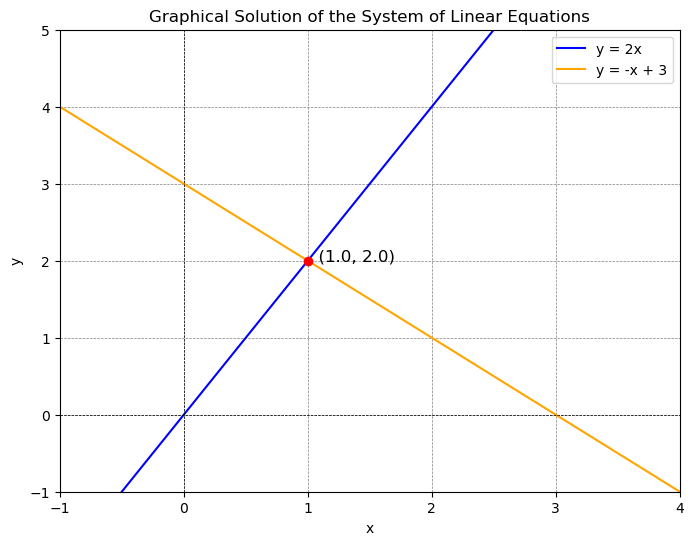

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define the coefficient matrix A and the result vector b
A = torch.tensor([[2, -1],
                  [1, 1]], dtype=torch.float32)

b = torch.tensor([[0],
                  [3]], dtype=torch.float32)

# Calculate the inverse of A
A_inv = torch.inverse(A)

# Solve for x using the inverse
x = A_inv @ b

# Print the solution
print("Solution (x1, x2):", x.flatten().tolist())

# Prepare data for plotting
x_values = np.linspace(-1, 4, 100)  # Range of x values for plotting
y1 = 2 * x_values                   # y = 2x
y2 = -x_values + 3                  # y = -x + 3

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y1, label='y = 2x', color='blue')
plt.plot(x_values, y2, label='y = -x + 3', color='orange')
plt.scatter(x[0], x[1], color='red', zorder=5)  # Plot the solution point
plt.text(x[0].item(), x[1].item(), f'  ({x[0].item()}, {x[1].item()})', fontsize=12)

# Set plot limits and labels
plt.xlim(-1, 4)
plt.ylim(-1, 5)
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Graphical Solution of the System of Linear Equations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


We can see that the solution (corresponding to the line crossing) is when $x=1$
 and $y=2$
. It confirms what we found with the matrix inversion!

By solving the equations, we find optimal conditions that satisfy multiple criteria simultaneously. This method is widely applicable across various fields, demonstrating the power and utility of linear algebra in solving complex problems efficiently.

## Singular Matrices

Some matrices are not invertible. They are called **singular**.

## Conclusion

This introduces different cases according to the linear system because ${A}^{-1}$ 
 exists only if the equation ${Ax}={b}$
 has one and only one solution

In [ ]:
# import packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Plot style

import seaborn as sns
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

## Linear Combinations

A **linear combination** of a set of vectors (or solutions) is an expression formed by multiplying each vector by a scalar and then adding the results together. 

For two vectors $\mathbf{x}$ and $\mathbf{y}$, a linear combination can be expressed as:

$$
\mathbf{z} = \alpha \mathbf{x} + \beta \mathbf{y},
$$

where $\alpha$ and $\beta$ are scalars.

### Meaning

1. **Scalars**: The scalars ($\alpha$ and $\beta$) determine how much of each vector contributes to the new vector $\mathbf{z}$. If a scalar is zero, that vector does not contribute to the combination.

2. **Geometric Interpretation**: 
   - If $\mathbf{x}$ and $\mathbf{y}$ are represented as arrows in a geometric space, then the linear combination $\mathbf{z}$ can be thought of as a point that lies on the line that passes through both vectors.
   - For example, if $\alpha = 1$ and $\beta = 0$, then $\mathbf{z}$ is simply $\mathbf{x}$. If $\alpha = 0$ and $\beta = 1$, then $\mathbf{z}$ is $\mathbf{y}$. For values between $0$ and $1$, $\mathbf{z}$ will be a point on the line segment between $\mathbf{x}$ and $\mathbf{y}$.

3. **Span**: The set of all possible linear combinations of a set of vectors defines a **span**. The span of vectors $\{\mathbf{x}, \mathbf{y}\}$ includes all points that can be reached by varying the scalars $\alpha$ and $\beta$. If the vectors are linearly independent, they span a plane in higher-dimensional space.

### Example

Given two vectors:

$$
\mathbf{x} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad \mathbf{y} = \begin{bmatrix} 3 \\ 4 \end{bmatrix},
$$

a linear combination could be:

$$
\mathbf{z} = 2 \mathbf{x} + 3 \mathbf{y} = 2 \begin{bmatrix} 1 \\ 2 \end{bmatrix} + 3 \begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 2 + 9 \\ 4 + 12 \end{bmatrix} = \begin{bmatrix} 11 \\ 16 \end{bmatrix}.
$$

This shows how different scalars influence the resulting vector $\mathbf{z}$.


In [ ]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact

def plot_linear_combinations(alpha=1, beta=1):
    """
    Plots vectors x, y, and their linear combination z = alpha * x + beta * y in 2D space.

    :param alpha: Scalar multiplier for vector x.
    :param beta: Scalar multiplier for vector y.
    """
    # Define vectors x and y
    x = np.array([1, 2])
    y = np.array([3, 4])

    # Calculate the linear combination z
    z = alpha * x + beta * y

    # Create figure
    fig = go.Figure()

    # Plot vector x
    fig.add_trace(go.Scatter(
        x=[0, x[0]],
        y=[0, x[1]],
        mode='lines+markers+text',
        name=f'Vector x: {x}',
        line=dict(width=3, color='blue'),
        marker=dict(size=8),
        text=[None, f'x: {x}'],
        textposition="top right"
    ))

    # Plot vector y
    fig.add_trace(go.Scatter(
        x=[0, y[0]],
        y=[0, y[1]],
        mode='lines+markers+text',
        name=f'Vector y: {y}',
        line=dict(width=3, color='green'),
        marker=dict(size=8),
        text=[None, f'y: {y}'],
        textposition="top right"
    ))

    # Plot linear combination z
    fig.add_trace(go.Scatter(
        x=[0, z[0]],
        y=[0, z[1]],
        mode='lines+markers+text',
        name=f'Linear Combination z: {z}',
        line=dict(width=3, color='red'),
        marker=dict(size=8),
        text=[None, f'z: {z}'],
        textposition="top right"
    ))

    # Plot the span as a shaded area between vectors
    fig.add_trace(go.Scatter(
        x=[0, x[0], z[0], y[0], 0],
        y=[0, x[1], z[1], y[1], 0],
        fill='toself',
        fillcolor='rgba(200, 200, 200, 0.3)',
        line=dict(width=0),
        name='Span of x and y'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title='2D Visualization of Linear Combinations',
        xaxis=dict(title='X-axis', range=[-1, 5]),
        yaxis=dict(title='Y-axis', range=[-1, 5]),
        showlegend=True,
        autosize=False,
        width=600,
        height=600
    )

    # Show the figure
    fig.show()

# Use an interactive widget to adjust alpha and beta dynamically
interact(plot_linear_combinations, alpha=(-5, 5, 0.1), beta=(-5, 5, 0.1))


interactive(children=(FloatSlider(value=1.0, description='alpha', max=5.0, min=-5.0), FloatSlider(value=1.0, d…

<function __main__.plot_linear_combinations(alpha=1, beta=1)>

## Real-World Applications of Linear Combinations

1. **Computer Graphics**: Used for color interpolation and blending in rendering scenes.
2. **Machine Learning**: Applied in linear regression and support vector machines for predicting outcomes based on features.
3. **Economics**: Represents combinations of goods in utility functions to analyze consumer behavior.
4. **Engineering**: Analyzes forces in structural stability and load interactions.
5. **Robotics**: Utilized in path planning and motion control for navigating environments.
6. **Finance**: Models investment portfolios as linear combinations of asset returns to optimize risk and return.
7. **Data Science**: Employed in Principal Component Analysis (PCA) for dimensionality reduction and data visualization.
8. **Signal Processing**: Represents audio signals as linear combinations of waveforms for filtering and compression.


# Linear Dependence and Span

In the context of systems of linear equations, consider the equation:

$$ 
\mathbf{Ax} = \mathbf{b} 
$$

This can be expanded to represent multiple equations with multiple unknowns:

$$ 
\begin{aligned}
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n &= b_1 \\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n &= b_2 \\
&\vdots \\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n &= b_m
\end{aligned}
$$

Here, we know the coefficients $A_{i,j}$ and the constants $b_i$. Our goal is to find the values of the variables $x_1, x_2, \ldots, x_n$ that satisfy all equations.

## Number of Solutions

The first question we encounter when dealing with such a system is: **What is the number of solutions?**

There are three possible cases for the number of solutions to the equation $\mathbf{Ax} = \mathbf{b}$:

1. No solution
2. One solution
3. An infinite number of solutions

### Why Can't There Be More Than One Solution?

#### Intuition

The reason we can't have more than one solution or fewer than an infinite number lies in the nature of linear systems. Two lines can intersect at most once.

To visualize this, consider a two-dimensional space with two equations represented as lines. The solutions correspond to the intersection points of these lines. The possibilities are:

- **No solution**: The lines are parallel and never intersect.
- **One solution**: The lines intersect at a single point.
- **Infinite solutions**: The lines are superimposed (i.e., they are the same line).

-----

*A system of equations can have either no solution, one solution, or an infinite number of solutions. Two lines cannot cross more than once but can be parallel or superimposed.*

-----

### Proof of the Solution Case

Let's assume we have two solutions, $\mathbf{x}$ and $\mathbf{y}$, to our system. This means:

$$ 
\begin{cases}
\mathbf{Ax} = \mathbf{b} \\
\mathbf{Ay} = \mathbf{b}
\end{cases}
$$

Now, consider the linear combination of these solutions:

$$ 
\mathbf{z} = \alpha \mathbf{x} + (1 - \alpha) \mathbf{y} 
$$

for any scalar $\alpha$. We can show that $\mathbf{z}$ is also a solution:

1. Substitute $\mathbf{z}$ into the equation:

$$ 
\mathbf{Az} = \mathbf{A}(\alpha \mathbf{x} + (1 - \alpha) \mathbf{y}) 
$$

2. Distributing $\mathbf{A}$ gives:

$$ 
\mathbf{Az} = \mathbf{A}(\alpha \mathbf{x}) + \mathbf{A}((1 - \alpha) \mathbf{y}) 
$$

3. Using the property that $\mathbf{Ax} = \mathbf{b}$ and $\mathbf{Ay} = \mathbf{b}$:

$$ 
\mathbf{Az} = \alpha \mathbf{b} + (1 - \alpha) \mathbf{b} 
$$

4. Simplifying results in:

$$ 
\mathbf{Az} = \mathbf{b}(\alpha + (1 - \alpha)) = \mathbf{b}
$$

This shows that $\mathbf{z}$ is indeed a solution. Thus, if there are two distinct solutions, all linear combinations of those solutions are also solutions, leading to either a single solution or infinitely many solutions.


# Matrix Representation of the System

The equation $\mathbf{Ax} = \mathbf{b}$ can be represented using a matrix $\mathbf{A}$, which contains the coefficients (or weights) of each variable, and a vector $\mathbf{x}$, which represents the variables themselves. The product of matrix $\mathbf{A}$ and vector $\mathbf{x}$ yields another vector $\mathbf{b}$ of size $m$:

$$ 
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_m
\end{bmatrix}.
$$

This matrix equation corresponds to the following set of linear equations:

$$ 
\begin{aligned}
    A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n &= b_1 \\
    A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n &= b_2 \\
    &\vdots \\
    A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n &= b_m.
\end{aligned}
$$

## Intuitive Explanation

The structure of matrix $\mathbf{A}$ provides valuable insights into the system. The number of columns in $\mathbf{A}$ represents the number of dimensions in our vector space, indicating how many different directions we can travel in that space. Each column corresponds to a variable, and the rows represent the equations.

The solutions to our linear system relate to the different paths we can take to reach the vector $\mathbf{b}$. In essence, finding a solution means identifying a combination of movements through these dimensions that leads to the desired outcome represented by $\mathbf{b}$.

To better understand this representation, it's essential to recognize that there are two ways to visualize the system of equations: the *row figure* and the *column figure*.

- **Row Figure**: Focuses on each equation as a row in the matrix, showing how each variable contributes to the outcome.
- **Column Figure**: Emphasizes how each variable (column) interacts with the equations (rows) to influence the results.

By examining both figures, we gain a comprehensive understanding of the relationships between the variables and the equations they satisfy.


# Matrix Representation of the System

The equation $\mathbf{Ax} = \mathbf{b}$ is represented using a matrix $\mathbf{A}$ that contains the coefficients (or weights) of each variable, and a vector $\mathbf{x}$ that represents the variables themselves. The product of matrix $\mathbf{A}$ and vector $\mathbf{x}$ produces another vector $\mathbf{b}$ of size $m$:

$$ 
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_m
\end{bmatrix}.
$$

This matrix equation corresponds to a set of linear equations:

$$ 
\begin{aligned}
    A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n &= b_1 \\
    A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n &= b_2 \\
    &\vdots \\
    A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n &= b_m.
\end{aligned}
$$

## Intuitive Explanation

The matrix $\mathbf{A}$ offers insights into the system of equations. The number of columns in $\mathbf{A}$ indicates the number of dimensions in our vector space, representing how many different directions we can travel. Each column corresponds to a variable, while the rows represent the equations.

The solutions to our linear system correspond to the various paths we can take to reach the vector $\mathbf{b}$. Essentially, finding a solution involves identifying combinations of movements through these dimensions that lead to the desired outcome represented by $\mathbf{b}$.

To better understand this representation, we can visualize the system of equations in two ways: through the *row figure* and the *column figure*.

# Graphical Views: Row and Column Figures

When examining the matrix 

$$ 
\mathbf{A} = 
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix},
$$ 

we can analyze it by its rows or columns. The entries represent the weights corresponding to each variable. Each row synthesizes one equation, while each column shows the set of weights assigned to a specific variable.

## The Row Figure

The row figure provides a familiar representation, particularly for single equations, and can be extended to accommodate multiple equations. In this representation, the solutions correspond to sets of values for the variables $x_1, x_2, \ldots, x_n$ that satisfy all equations. For example, when $\mathbf{A}$ is a $2 \times 2$ matrix, the equations correspond to lines in a two-dimensional space, with the solution found at their intersection.

### Intuition of the Row Figure

The row figure emphasizes how each equation can be visualized as a line (or hyperplane) in space. The intersection points of these lines represent possible solutions:

- **One unique solution**: Lines intersect at a single point.
- **No solution**: Lines are parallel and never meet.
- **Infinite solutions**: Lines overlap completely.

While the row figure provides clarity regarding the relationships between equations and their solutions, representing systems with more than three parameters can be challenging.

## The Column Figure

In contrast, the column figure focuses on the variables, treating each column of the matrix as a separate dimension in the space. This representation highlights how each variable contributes to the overall solution.

### Intuition of the Column Figure

In the column figure:

- Each variable represents a dimension, and the columns correspond to the coefficients of those variables in the equations.
- Relationships between columns can reveal dependencies and redundancies among variables.

For instance, if one column can be expressed as a linear combination of others, it indicates linear dependence, suggesting that not all variables are necessary to describe the system.

### Visualizing Higher Dimensions

To represent systems with more than three parameters effectively, various visualization techniques can be employed. For example, color coding can illustrate additional dimensions, making complex relationships more comprehensible. Ultimately, the choice of representation depends on the context and the number of variables involved.


In [ ]:
import numpy as np
import plotly.graph_objects as go

def plot_hyperplanes(matrix, vector):
    """
    Plots the hyperplanes corresponding to the rows of the matrix and their intersection point.

    :param matrix: A 2D NumPy array representing the coefficients of the system of equations.
    :param vector: A 1D NumPy array representing the right-hand side of the system of equations.
    """
    # Create mesh grid for plotting planes
    x = np.linspace(-5, 5, 30)
    y = np.linspace(-5, 5, 30)
    X, Y = np.meshgrid(x, y)

    # Function to calculate Z from equation Ax + By + Cz = D
    def plane_eq(a, b, c, d, X, Y):
        return (d - a * X - b * Y) / c

    # Initialize figure
    fig = go.Figure()

    # Define colors for the planes
    colors = ['rgba(0, 128, 255, 0.5)', 'rgba(255, 0, 0, 0.5)', 'rgba(0, 255, 0, 0.5)']

    # Plot each hyperplane based on the rows of the matrix
    for i in range(matrix.shape[0]):
        Z = plane_eq(matrix[i, 0], matrix[i, 1], matrix[i, 2], vector[i], X, Y)
        fig.add_trace(go.Surface(
            x=X, y=Y, z=Z, 
            opacity=0.7, 
            showscale=False, 
            surfacecolor=np.full_like(Z, i), 
            colorscale=[[0, colors[i % len(colors)]], [1, colors[i % len(colors)]]],
            name=f'Plane {i+1}: {matrix[i, 0]}x + {matrix[i, 1]}y + {matrix[i, 2]}z = {vector[i]}'
        ))

    # Solve the system to find the intersection point, if possible
    try:
        solution = np.linalg.solve(matrix, vector)
        fig.add_trace(go.Scatter3d(
            x=[solution[0]],
            y=[solution[1]],
            z=[solution[2]],
            mode='markers',
            marker=dict(size=8, color='yellow'),
            name='Intersection (Solution)'
        ))
    except np.linalg.LinAlgError:
        print("No unique solution: planes are parallel or coincident.")

    # Update layout for better visualization
    fig.update_layout(
        title='3D Visualization of Hyperplanes Representing Linear Equations',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z',
            aspectmode='cube'
        ),
        showlegend=True
    )

    # Show the figure
    fig.show()


# Define the matrix A and vector b
A = np.array([
    [1, 1, 1],
    [2, -1, 1],
    [-1, 2, 1]
])

b = np.array([3, 1, 2])

# Plot the hyperplanes
plot_hyperplanes(A, b)


## Overdetermined and underdetermined systems

A linear system of equations can be viewed as a set of $n-1$
-dimensional hyperplanes in a n-dimensional space. So the linear system can be characterized with its number of equations ($m$
) and the number of unknown variables (
$n$).


1. If there are more equations than unknows the system is called overdetermined. 

2. If there is more unknowns than equations the system is called underdetermined. 

## Spaces and Subspaces

The space of a vector defines all the values that the vector can take. Vector spaces are typically denoted by $\mathbb{R}$ for real numbers. When dealing with multiple dimensions, the space is represented as $\mathbb{R}^n$, where $n$ corresponds to the number of dimensions. For example, $\mathbb{R}^2$ represents the familiar $x-y$ plane, where both $x$ and $y$ are real numbers.

#### Subspaces

A subspace is a subset of a vector space that is also a vector space itself. For instance, if you take a 2-dimensional plane within $\mathbb{R}^3$ (three-dimensional space), this plane is considered a subspace of the original $\mathbb{R}^3$ space. Similarly, if you have a line within a $\mathbb{R}^2$ space, that line is a subspace of the original space.

#### Linear Combinations and spaces

The linear combination of vectors results in vectors that remain within the original space. Specifically, any linear combination of vectors from a space will produce a vector that is also within that same space. For instance, in $\mathbb{R}^2$, if you take two lines, any linear combination of points from those lines will yield a vector that also lies within $\mathbb{R}^2$.

This property of linear combinations is crucial because it illustrates that the structure of the original space is preserved. Thus, when combining vectors from a specific space, the resulting vectors will always belong to that space.


## Graphical View 2: The column figure

It is also possible to represent the set of equations by considering that the solution vector $b$
 corresponds to a linear combination of each columns multiplied by their weights.

From the set of equations:

$$ A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m $$


The column form is then:

$$ x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}$$


-------

On a graphical point of view, we have to travel from the origin (zero on every dimensions) to the point of coordinate $b$
. The columns of $A$ 
 give us the directions we can travel by and their weights are the length of the way in that direction.

The columns of $A$
 give us the directions we can travel by and their weights are the length of the way in each direction.

We can see that it is working! We arrive to the point $(-1,4)$

## Determine if the system has one and only one solution for every value of $b$

We will now see how to determine if a system of equations has one and only one solution. Note that this is only the general cases. This can be split into two requirements:

1. The system must have at least one solution
2. Then, the system must have only one solution


### Requirement 1. Underdetermined system: the system must have at least one solution for each value of $b$ : $n\geq m$
: 
An underdetermined system of equations is a system with less equations than unknowns
If we want our system to have one and only one solution a first requirement is that $n$
 must not be bigger than $m$
.

Let's take the example of a $(2 \times 3$
) matrix that corresponds to a set of 2 equations with 3 unknowns variables:


$$ \begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}$$


$$ x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix} $$




### Requirement 2. Overdetermined system: the system must have only one solution for each value of $b$ 
:  $m\geq n$
An overdetermined system of equations is a system with more equations than unknowns
The column figure is helpful to understand why the linear system has usually no solution if 
 (the number of unknowns) is smaller than 
 (the number of equations). Let's add 1 equation to the above system in order to end up with a ($3 \times 2$
) matrix (3 equations and 2 unknowns):



$$ \begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}$$

-----

This corresponds to:


$$ x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}$$

So we are still traveling in our 2-dimensional space (see the plot of the column space above) but the point that we are looking for is defined by 3 dimensions. There are cases where the third coordinate does not rely on our 2-dimensional $x-y$
 plane. In that case no solution exists.

We are traveling in a 2D space but the solution is defined by 3 dimensions. If the third coordinate does not rely on our 2D 
$x-y$
 plane then there is no solution.



### Linear Dependence

The number of columns in a matrix provides insight into the potential solutions of a linear system. However, it's crucial to consider the number of linearly independent columns. Columns are said to be linearly dependent if at least one of them can be expressed as a linear combination of the others. 

In practical terms, when two vectors (or columns) are linearly dependent, they point in the same direction. This means that they do not contribute additional dimensions to the space, limiting our ability to explore and reach the vector $\mathbf{b}$.

#### Example of Linear Dependence

Consider the following system of linear equations:

$$ 
\begin{cases}
y = 2x + 6 \\
y = 2x
\end{cases}
$$

We can rewrite these equations in standard form:

$$ 
\begin{cases}
2x - y = -6 \\
2x - y = 0
\end{cases} 
$$

In this example, the first equation represents a line that has a y-intercept of 6, while the second equation represents a line that passes through the origin. Both lines have the same slope (2), indicating that they are parallel.

### Intuition Behind Linear Dependence

Since the two equations represent parallel lines, they will never intersect. This situation results in a system with no solution, illustrating linear dependence. If we visualize this in a 2D space:

- **First Equation**: The line $y = 2x + 6$ is shifted up and does not intersect with the x-axis.
- **Second Equation**: The line $y = 2x$ passes through the origin.

Because both lines are parallel and have the same slope, we cannot reach any point represented by $\mathbf{b}$ that would satisfy both equations simultaneously. Therefore, the presence of linearly dependent columns indicates that we do not have enough unique dimensions to find a solution to the system.

This concept is essential in linear algebra, as it helps identify when a system of equations has no solution, one unique solution, or infinitely many solutions.


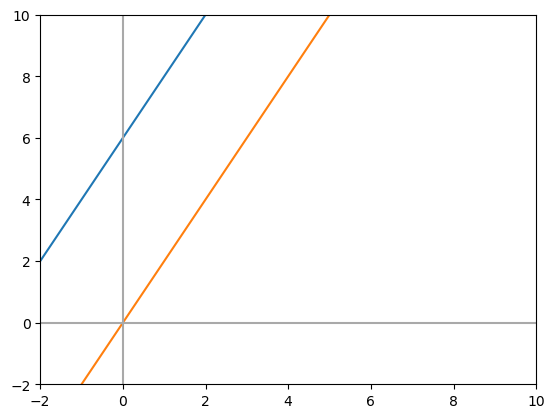

In [ ]:

x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()
plt.close()

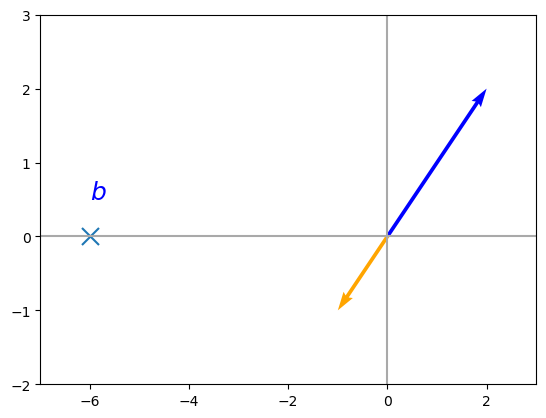

In [ ]:
u = [0,0,2,2]
v = [0,0,-1,-1]

plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=['blue', 'orange'])
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-6,0,marker='x',s=150)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
plt.show()
plt.close()

We would like to go to $b$
 but the only path we can take is the blue/orange line. The second equation doesn't provide us with a new direction to take since it is just a linear combination of the first one.

Thus, an overdetermined system of independant equations has at most 1 solution.

# Introduction

In the context of machine learning and deep learning, understanding the concept of norms is crucial. Norms are commonly used to evaluate the error of a model, specifically to measure the difference between a neural network's output and the expected output (the actual label or value). You can think of a norm as a way to quantify the "length" of a vector, providing a mapping from a vector to a positive scalar value. Different types of norms can be employed, and we will explore a few examples.



## What is a Norm?

A norm is a function that measures the size or length of a vector and satisfies specific properties:

1. **Non-Negativity**: Norms are always non-negative. Just like lengths cannot be negative, the norm of a vector reflects this property.

2. **Zero Vector**: The norm is zero if and only if the vector itself is the zero vector.

3. **Triangle Inequality**: For any two vectors, the norm of their sum is less than or equal to the sum of their norms:
   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|.$$

4. **Scalar Multiplication**: The norm of a vector multiplied by a scalar is equal to the absolute value of the scalar multiplied by the norm of the vector:
   $$\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|.$$

5. **Notation**: Norms are typically denoted with double vertical bars, e.g., $\|\mathbf{x}\|$.

### Understanding Norms Intuitively

Norms serve as powerful tools in linear algebra, providing insights into the "size" of vectors. For example, the **$\ell_2$ norm** measures the Euclidean length of a vector. This concept of size pertains to the magnitude of a vector's components rather than its dimensionality.

Formally, a norm $\|\cdot\|$ is defined by the following properties:

1. If you scale a vector $\mathbf{x}$ by a scalar $\alpha$, the norm scales accordingly:
   $$\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|.$$

2. The triangle inequality states that the sum of the norms of two vectors is at least as large as the norm of their sum:
   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|.$$

3. The norm is non-negative and only equals zero if the vector is the zero vector:
   $$\|\mathbf{x}\| > 0 \text{ for all } \mathbf{x} \neq 0.$$

### Types of Norms

Different norms encode various notions of size. For instance, the **Euclidean norm**—often introduced in elementary geometry—calculates the hypotenuse of a right triangle. It is formally defined as:

$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}.$$

This method of calculating the $\ell_2$ norm is widely used in practice, especially in machine learning applications, as it provides a clear measure of the distance between points in space.


##### The triangle inequality

The norm of the sum of some vectors is less than or equal to the sum of the norms of these vectors

$$ || u +v|| \leq ||u||+||v||$$


 ${u}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}$ and ${v}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}$

$$ ||{{u}+{v}}|| = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43$$

$$ ||u||+||v|| = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55 $$




In [ ]:
import torch

# Define the vectors u and v
u = torch.tensor([1, 6], dtype=torch.float32)
v = torch.tensor([4, 2], dtype=torch.float32)

# Calculate the norms
norm_u = torch.norm(u)
norm_v = torch.norm(v)
norm_sum = torch.norm(u + v)

# Print the results
print(f"||u|| = {norm_u:.2f}")
print(f"||v|| = {norm_v:.2f}")
print(f"||u + v|| = {norm_sum:.2f}")
print(f"||u|| + ||v|| = {norm_u + norm_v:.2f}")


||u|| = 6.08
||v|| = 4.47
||u + v|| = 9.43
||u|| + ||v|| = 10.55


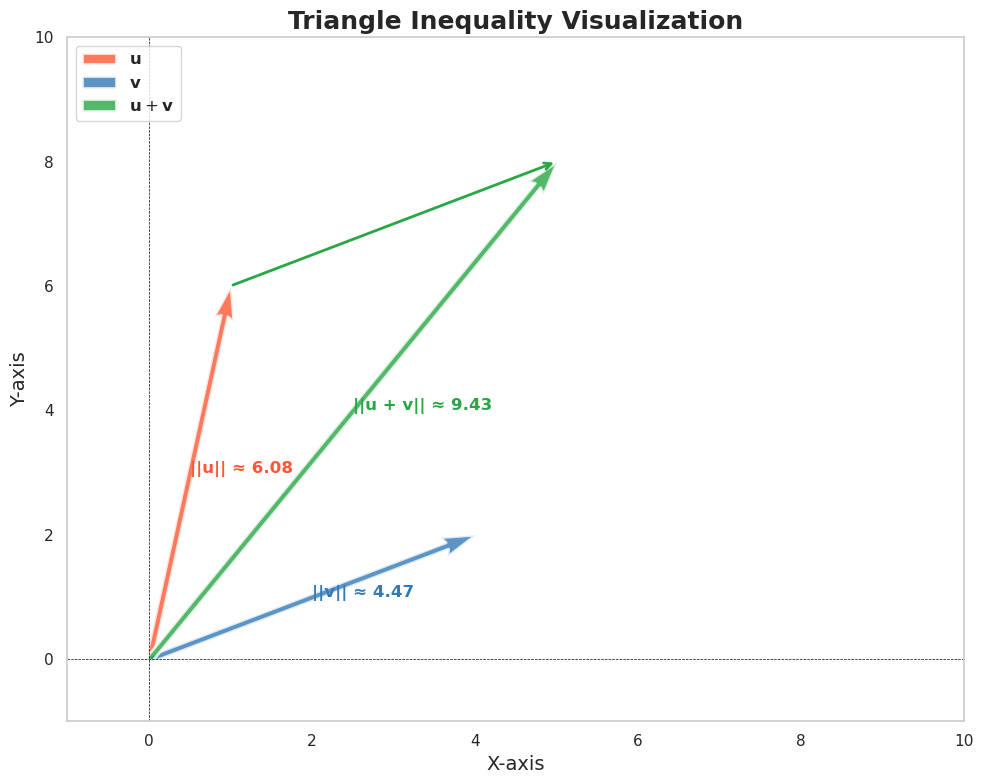

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style
sns.set_theme(style="whitegrid")

def plot_triangle_inequality(u, v):
    # Convert lists to numpy arrays
    u = np.array(u)
    v = np.array(v)
    
    # Calculate the sum of the vectors
    sum_uv = u + v
    
    # Calculate norms
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    norm_sum_uv = np.linalg.norm(sum_uv)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # Plot vector u
    plt.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1, color='#ff5733', linewidth=2, label=r'$\mathbf{u}$', alpha=0.8)
    
    # Plot vector v
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='#337ab7', linewidth=2, label=r'$\mathbf{v}$', alpha=0.8)
    
    # Plot the sum of u and v
    plt.quiver(0, 0, sum_uv[0], sum_uv[1], angles='xy', scale_units='xy', scale=1, color='#28a745', linewidth=2, label=r'$\mathbf{u} + \mathbf{v}$', alpha=0.8)

    # Add arrows to indicate directions
    plt.annotate('', xy=sum_uv, xytext=u, arrowprops=dict(arrowstyle='->', color='#28a745', lw=2))
    
    # Labels and limits
    plt.xlim(-1, 10)
    plt.ylim(-1, 10)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(False)
    plt.title('Triangle Inequality Visualization', fontsize=18, fontweight='bold')
    plt.xlabel('X-axis', fontsize=14)
    plt.ylabel('Y-axis', fontsize=14)
    plt.legend(fontsize=12, loc='upper left')
    
    # Show the norms as annotations
    plt.text(u[0] / 2, u[1] / 2, f'||u|| ≈ {norm_u:.2f}', fontsize=12, color='#ff5733', weight='bold')
    plt.text(v[0] / 2, v[1] / 2, f'||v|| ≈ {norm_v:.2f}', fontsize=12, color='#337ab7', weight='bold')
    plt.text(sum_uv[0] / 2, sum_uv[1] / 2, f'||u + v|| ≈ {norm_sum_uv:.2f}', fontsize=12, color='#28a745', weight='bold')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Define the vectors
u = [1, 6]
v = [4, 2]

# Plot the triangle inequality
plot_triangle_inequality(u, v)


Geometrically, this simply means that the shortest path between two points is a line

# P-norms: General Rules

The \( p \)-norm of a vector provides a measure of its size or length. The process to calculate the \( p \)-norm can be summarized in the following steps:

1. **Calculate the absolute value** of each element of the vector.
2. **Raise** each of these absolute values to the power of \( p \).
3. **Sum** all the powered absolute values.
4. **Take the power** of the result to \( \frac{1}{p} \).

This can be compactly expressed with the formula:

$$ ||\mathbf{x}||_p = \left(\sum_{i} |x_i|^p\right)^{1/p} $$

To clarify this concept, let's explore some widely used \( p \)-norms.

## The \( L^1 \) Norm

When \( p = 1 \), the \( L^1 \) norm is simply the sum of the absolute values of the vector's components:

$$ ||\mathbf{x}||_1 = \sum_{i} |x_i| $$

This norm is often referred to as the Manhattan distance, as it represents the total distance traveled along axes in a grid-like path. Its properties include:

- **Robustness to Outliers:** The \( L^1 \) norm is less sensitive to outliers compared to the \( L^2 \) norm.
- **Sparsity:** It tends to produce sparse solutions in optimization problems, making it useful in feature selection.

## The Euclidean Norm (\( L^2 \) Norm)

For \( p = 2 \), we arrive at the Euclidean norm, which is perhaps the most commonly used norm in mathematics:

$$ ||\mathbf{x}||_2 = \sqrt{\sum_{i} x_i^2} \Leftrightarrow \sqrt{|x_1|^2 + |x_2|^2 + \cdots + |x_n|^2} $$

### Example

Consider the vector:

$$ \mathbf{u} = 
\begin{bmatrix}
    3 \\
    4
\end{bmatrix} $$

Calculating the Euclidean norm:

$$
\begin{align*}
||\mathbf{u}||_2 &= \sqrt{|3|^2 + |4|^2} \\
&= \sqrt{9 + 16} \\
&= \sqrt{25} \\
&= 5
\end{align*}
$$

Thus, the \( L^2 \) norm of \( \mathbf{u} \) is \( 5 \).

We can also compute the \( L^2 \) norm using NumPy's `linalg.norm` function. This computation applies not just in 2-dimensional space but extends to any \( n \)-dimensional space:

$$ ||\mathbf{u}||_2 = \sqrt{u_1^2 + u_2^2 + \cdots + u_n^2} $$

### Properties of the \( L^2 \) Norm

- **Geometric Interpretation:** The \( L^2 \) norm represents the length of the vector from the origin to the point defined by the vector.
- **Sensitivity to Outliers:** The \( L^2 \) norm is more sensitive to outliers compared to the \( L^1 \) norm, making it less robust in certain applications.

## The Squared Euclidean Norm

The squared Euclidean norm eliminates the square root, resulting in a simpler expression:

$$ ||\mathbf{x}||_2^2 = \sum_{i} |x_i|^2 $$

This squared norm is particularly useful in machine learning due to its straightforward calculation using the dot product:

$$ ||\mathbf{x}||_2^2 = \mathbf{x}^T \mathbf{x} $$

### Example

Consider the vector:

$$ \mathbf{x} = 
\begin{bmatrix}
    2 \\
    5 \\
    3 \\
    3
\end{bmatrix} $$

The transpose is:

$$ \mathbf{x}^T = 
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} $$

Calculating the squared norm:

$$
\begin{align*}
\mathbf{x}^T \mathbf{x} &= 
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \cdot 
\begin{bmatrix}
    2 \\
    5 \\
    3 \\
    3
\end{bmatrix} \\
&= 2 \times 2 + 5 \times 5 + 3 \times 3 + 3 \times 3 \\
&= 4 + 25 + 9 + 9 \\
&= 47
\end{align*}
$$

## The \( L^1 \) Norm and Manhattan Distance

The \( L^1 \) norm is defined as:

$$ ||\mathbf{x}||_1 = \sum_{i=1}^{n} |x_i| $$

It is known as the Manhattan distance. This norm is less sensitive to outliers compared to the \( L^2 \) norm. It is derived by composing the absolute value with the sum operation.

### Properties of the \( L^1 \) Norm

- **Sparse Solutions:** In optimization, the \( L^1 \) norm encourages sparsity, making it useful in applications like LASSO regression.
- **Geometric Interpretation:** The \( L^1 \) norm represents the shortest path along the axes of a grid, resembling how one would navigate city blocks.

## General \( L_p \) Norms

Both the \( L^2 \) and \( L^1 \) norms are special cases of the more general \( L_p \) norms:

$$ ||\mathbf{x}||_p = \left(\sum_{i=1}^{n} |x_i|^p\right)^{1/p} $$

### Properties of \( L_p \) Norms

- **Convexity:** The \( L_p \) norm is a convex function for \( p \geq 1 \). This property is essential in optimization, as it guarantees that local minima are also global minima.
- **Continuity:** \( L_p \) norms are continuous functions of the vector, which is crucial for stability in optimization algorithms.

### Applications of \( p \)-norms

- **Machine Learning:** The choice of \( p \) can influence model performance. \( L^1 \) is useful for feature selection, while \( L^2 \) is common in regression.
- **Data Analysis:** \( p \)-norms can be used to measure distances in clustering algorithms, helping to group similar data points.
- **Optimization Problems:** Norms play a crucial role in formulating objective functions, particularly in regularization techniques.

Understanding these norms allows for a better evaluation of the magnitude of vectors in various contexts, facilitating tasks in optimization, machine learning, and data analysis.


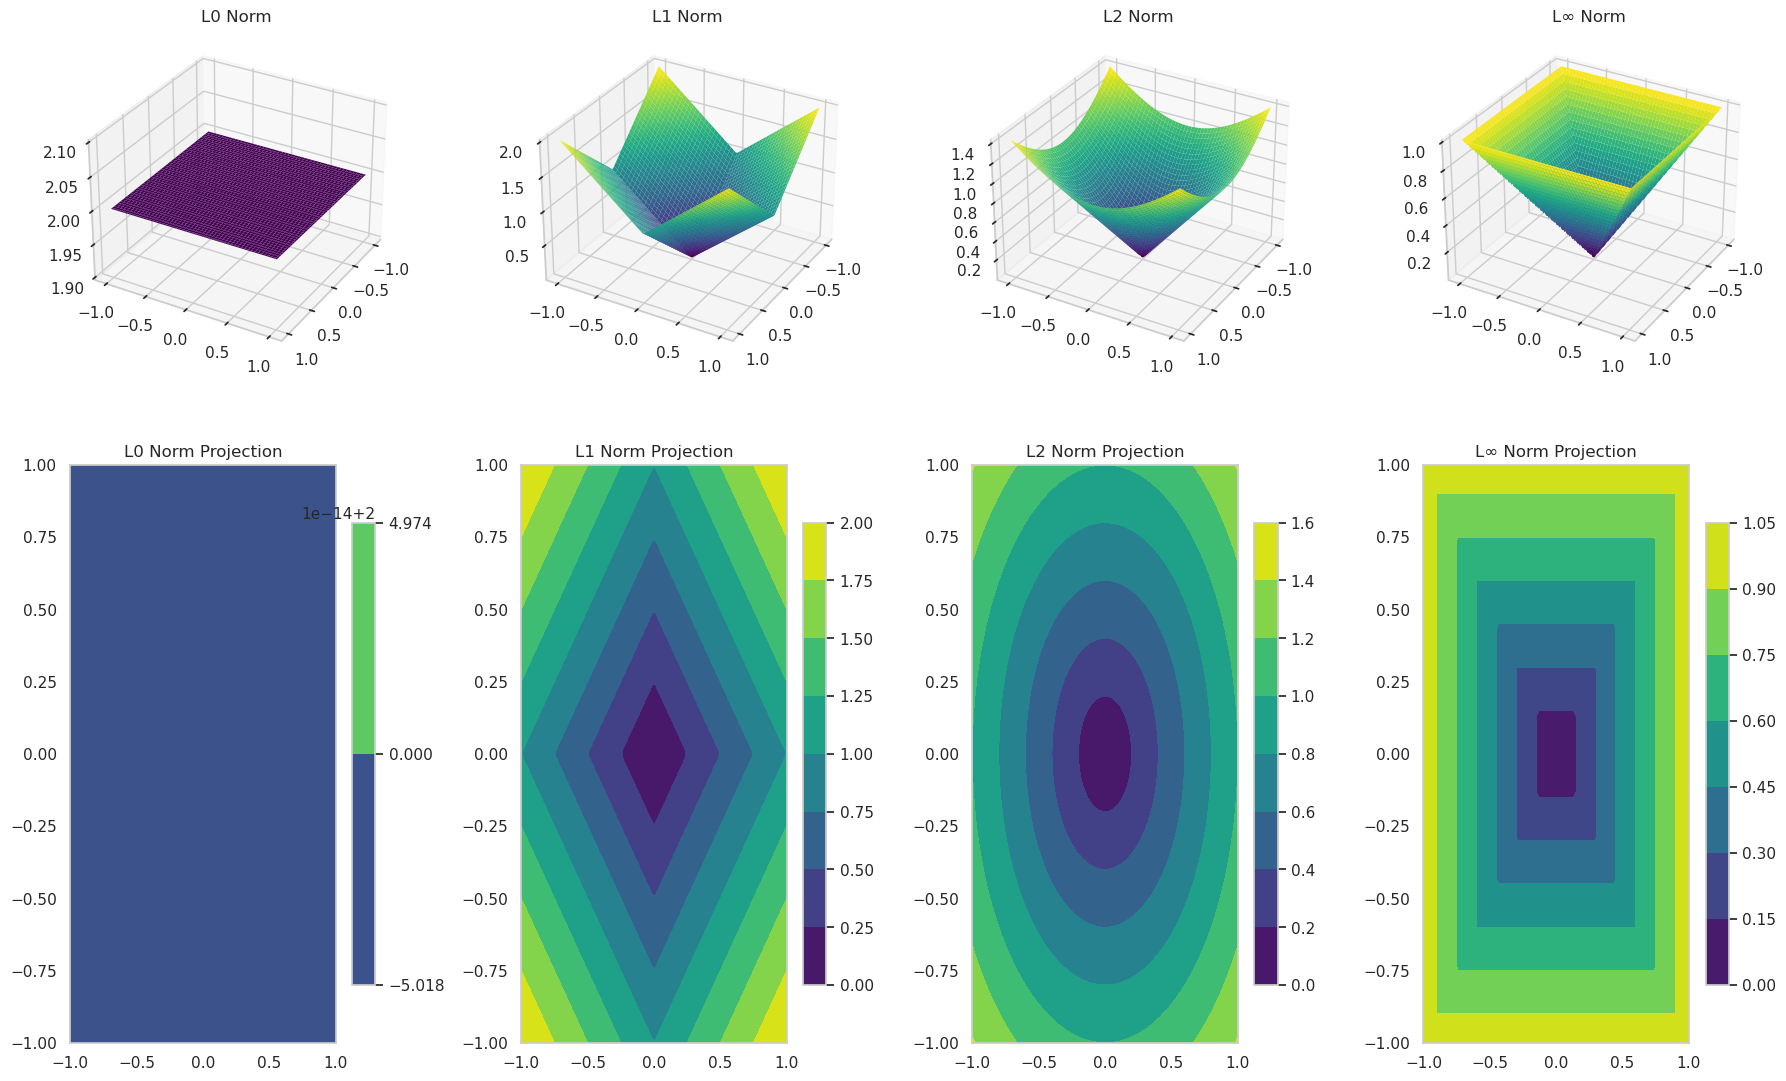

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_norms(grid_size=100):
    """Generate and plot 3D surfaces and 2D projections of various norms."""
    
    # Generate a meshgrid for plotting
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)

    # Define norms
    norms = {
        'L0 Norm': np.where(X == 0, 0, 1) + np.where(Y == 0, 0, 1),
        'L1 Norm': np.abs(X) + np.abs(Y),
        'L2 Norm': np.sqrt(X**2 + Y**2),
        'L∞ Norm': np.maximum(np.abs(X), np.abs(Y))
    }

    # Set up the figure for 3D plots
    fig = plt.figure(figsize=(18, 12))

    # Plot each norm in 3D and 2D
    for i, (name, Z) in enumerate(norms.items()):
        # 3D Surface plot
        ax3d = fig.add_subplot(2, 4, i + 1, projection='3d')
        ax3d.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax3d.set_title(name)
        ax3d.view_init(elev=30, azim=30)  # Set the angle of view for better visibility

        # 2D Contour projection
        ax2d = fig.add_subplot(2, 4, i + 5)
        contour = ax2d.contourf(X, Y, Z, cmap='viridis')
        ax2d.set_title(f"{name} Projection")
        plt.colorbar(contour, ax=ax2d, shrink=0.8)  # Add color bar for reference

    plt.tight_layout()
    plt.show()

# Run the plotting function
plot_norms()


# Intuitive Explanation of Different Norms

Norms are mathematical concepts used to measure the size or length of vectors in various ways. They are crucial in fields like machine learning, deep learning, optimization, and numerical analysis. Here's a detailed explanation of the norms visualized in the code:

## 1. L0 Norm (Pseudonorm)
- **Definition**: The L0 norm is technically not a true norm because it does not satisfy all mathematical properties of norms. It counts the number of non-zero elements in a vector.
- **Visualization**: In the plot, it is represented as flat with jumps, showing areas where the value changes from 0 to 1.
- **Use Case**: It's often used in sparse models, where the goal is to minimize the number of non-zero elements, like in feature selection or compressed sensing.
- **Intuition**: Imagine trying to count the number of steps you take that are non-zero in direction. It doesn’t care how far you go in each direction, just whether you moved or not.

## 2. L1 Norm (Manhattan or Taxicab Norm)
- **Definition**: The L1 norm measures the sum of the absolute values of the components of a vector, i.e.,
  \[
  \|x\|_1 = |x_1| + |x_2| + \ldots + |x_n|
  \]
- **Visualization**: It forms a diamond shape in 2D and a cone-like surface in 3D. The contours are lines that sum to a constant value, representing the sum of the absolute distances.
- **Use Case**: L1 norm is used in Lasso regression and regularization because it encourages sparsity (many zero weights), helping to simplify models.
- **Intuition**: Imagine a taxicab moving in a city grid. The distance traveled is the sum of its horizontal and vertical moves, like navigating a grid of streets.

## 3. L2 Norm (Euclidean Norm)
- **Definition**: The L2 norm calculates the "straight-line" or Euclidean distance to the origin, i.e.,
  \[
  \|x\|_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
  \]
- **Visualization**: The plot shows a circular contour in 2D and a smooth, rounded bowl in 3D. The further you are from the origin, the higher the value, forming concentric circles.
- **Use Case**: Widely used in optimization and machine learning (like Ridge regression), it penalizes larger weights, thus favoring smaller values and stabilizing the model.
- **Intuition**: It’s the most familiar "distance" concept—like measuring the shortest path between two points using a ruler.

## 4. L∞ Norm (Max Norm or Chebyshev Norm)
- **Definition**: The L∞ norm measures the maximum absolute value among the components of a vector, i.e.,
  \[
  \|x\|_\infty = \max(|x_1|, |x_2|, \ldots, |x_n|)
  \]
- **Visualization**: In 2D, it forms a square with edges parallel to the axes. In 3D, it looks like a pyramid with square bases, showing that the norm is dominated by the maximum value.
- **Use Case**: Useful in situations where the largest deviation dominates, like in some error analysis contexts where outliers or peaks matter the most.
- **Intuition**: Imagine spreading a blanket flat on a floor; the highest bump (max height) defines the overall measure, not the sum or any average of heights.

## Why Norms Matter in Machine Learning and Deep Learning
- **Error Calculation**: Norms help in defining loss functions, like L2 loss (mean squared error) or L1 loss (mean absolute error), which are critical for training models.
- **Regularization**: Norms are used to add penalties to the model weights (like L1 and L2 regularization), which help prevent overfitting by controlling the complexity of the model.
- **Stability and Convergence**: The choice of norm affects how optimization algorithms like gradient descent behave, impacting stability and convergence rates.
- **Distance and Similarity**: Norms are fundamental in defining distances between points in space, crucial for clustering, classification, and anomaly detection tasks.

## Visualization Insights:
- **L0 Norm**: Highlights sparsity but isn't smooth or differentiable, limiting its use in optimization directly.
- **L1 Norm**: Useful for sparse solutions, seen in its sharp, angular shape, indicating significant penalties for moving off-axis.
- **L2 Norm**: Smooth and differentiable, often yielding stable and predictable changes with small input variations.
- **L∞ Norm**: Emphasizes the largest deviation, providing a way to focus on the most extreme changes.


In [ ]:
import numpy as np
import plotly.graph_objects as go

def plot_euclidean_norm():
    """
    Creates a 3D visualization of the Euclidean norm ||(x, y)|| with interactive vector representation.
    """
    # Create a grid of points
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X**2 + Y**2)  # Euclidean norm (l2 norm)

    # Create the 3D surface plot
    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.9)])

    # Update layout
    fig.update_layout(
        title='3D Visualization of Euclidean Norm',
        scene=dict(
            xaxis_title='X-axis',
            yaxis_title='Y-axis',
            zaxis_title='Norm ||(x, y)||',
            aspectmode='cube'
        ),
        margin=dict(l=0, r=0, b=0, t=40),
    )

    # Add initial vector visualization
    vector_x = [0]
    vector_y = [0]
    vector_z = [0]
    
    fig.add_trace(go.Scatter3d(
        x=vector_x, y=vector_y, z=vector_z,
        mode='lines+text',
        line=dict(color='red', width=5),
        text=['Vector'],
        textposition='bottom center',
        hoverinfo='text'
    ))

    # Add click event to display the vector
    fig.update_traces(
        hoverinfo='x+y+z',
        hovertemplate='Clicked point: (x: %{x:.2f}, y: %{y:.2f}, ||(x,y)||: %{z:.2f})<extra></extra>'
    )

    # Define the callback function to update the vector
    def update_vector(trace, points, state):
        if points.point_inds:
            # Get the coordinates of the clicked point
            x_clicked = points.xs[0]
            y_clicked = points.ys[0]
            z_clicked = np.sqrt(x_clicked**2 + y_clicked**2)
            
            # Update the vector line to point from the origin to the clicked point
            fig.data[1].x = [0, x_clicked]
            fig.data[1].y = [0, y_clicked]
            fig.data[1].z = [0, z_clicked]

    # Register the click event
    fig.data[0].on_click(update_vector)

    # Show the figure
    fig.show()

# Call the function to plot the Euclidean norm
plot_euclidean_norm()


In [ ]:
import torch

# Example vector
x = torch.tensor([3.0, -4.0, 0.0, 2.0])

# L0 Norm (count non-zero elements)
l0_norm = (x != 0).sum().item()

# L1 Norm (Manhattan norm)
l1_norm = torch.norm(x, p=1).item()

# L2 Norm (Euclidean norm)
l2_norm = torch.norm(x, p=2).item()

# L∞ Norm (Max norm)
l_inf_norm = torch.norm(x, p=float('inf')).item()

# Print results
print(f"L0 Norm: {l0_norm}")
print(f"L1 Norm: {l1_norm}")
print(f"L2 Norm: {l2_norm}")
print(f"L∞ Norm: {l_inf_norm}")

L0 Norm: 3
L1 Norm: 9.0
L2 Norm: 5.385164737701416
L∞ Norm: 4.0


## Understanding Norms and Their Derivatives

Norms are mathematical functions that measure the magnitude of vectors in various ways. Different norms highlight distinct characteristics of vectors, making them crucial in optimization, machine learning, and data analysis. Let's dive deeper into the derivatives of some commonly used norms, particularly the squared L² norm and the L² norm, to understand their roles in optimization.

### Derivative of the Squared $L^2$ Norm

The squared $L^2$ norm is widely used because it simplifies calculations and smooths the optimization landscape. One significant advantage is that its partial derivatives are straightforward to compute, which makes it favorable in machine learning algorithms.

Given a vector:

$$ 
u = 
\begin{bmatrix}
    u_1 \\\\
    u_2 \\\\
    \vdots \\\\
    u_n
\end{bmatrix} 
$$

The squared $L^2$ norm is defined as:

$$ 
||{u}||_2^2 = u_1^2 + u_2^2 + \cdots + u_n^2 
$$

Calculating the partial derivatives with respect to each element:

$$ 
\begin{cases}
\dfrac{\partial ||{u}||_2^2}{\partial u_1} = 2u_1 \\\\
\dfrac{\partial ||{u}||_2^2}{\partial u_2} = 2u_2 \\\\
\vdots \\\\
\dfrac{\partial ||{u}||_2^2}{\partial u_n} = 2u_n
\end{cases} 
$$

#### **Intuition**:
- The derivative of the squared $L^2$ norm with respect to each component is directly proportional to that component, making it easy to compute and interpret.
- This norm penalizes large values strongly due to the squaring effect, which helps in minimizing large errors effectively.

### Derivative of the $L^2$ Norm

In contrast, the $L^2$ norm (or Euclidean norm) provides a true measure of the "distance" of the vector from the origin. The derivative of the $L^2$ norm is more complex because it accounts for all elements of the vector simultaneously.

The $L^2$ norm is defined as:

$$ 
||{u}||_2 = \sqrt{u_1^2 + u_2^2 + \cdots + u_n^2} = (u_1^2 + u_2^2 + \cdots + u_n^2)^{\frac{1}{2}}
$$

Calculating the partial derivative with respect to $u_1$:

$$ 
\begin{align*}
\dfrac{\partial ||{u}||_2}{\partial u_1} &=
\dfrac{1}{2}(u_1^2 + u_2^2 + \cdots + u_n^2)^{\frac{1}{2}-1} \cdot
\dfrac{\partial}{\partial u_1}(u_1^2 + u_2^2 + \cdots + u_n^2) \\\\
&= \dfrac{1}{2}(u_1^2 + u_2^2 + \cdots + u_n^2)^{-\frac{1}{2}} \cdot
\dfrac{\partial}{\partial u_1}(u_1^2 + u_2^2 + \cdots + u_n^2) \\\\
&= \dfrac{1}{2} \cdot \dfrac{1}{(u_1^2 + u_2^2 + \cdots + u_n^2)^{\frac{1}{2}}} \cdot
2u_1 \\\\
&= \dfrac{u_1}{\sqrt{(u_1^2 + u_2^2 + \cdots + u_n^2)}} 
\end{align*}
$$

Similarly, for all components:

$$ 
\begin{cases}
\dfrac{\partial ||{u}||_2}{\partial u_1} = \dfrac{u_1}{\sqrt{(u_1^2 + u_2^2 + \cdots + u_n^2)}} \\\\
\dfrac{\partial ||{u}||_2}{\partial u_2} = \dfrac{u_2}{\sqrt{(u_1^2 + u_2^2 + \cdots + u_n^2)}} \\\\
\vdots \\\\
\dfrac{\partial ||{u}||_2}{\partial u_n} = \dfrac{u_n}{\sqrt{(u_1^2 + u_2^2 + \cdots + u_n^2)}}
\end{cases} 
$$

#### **Intuition**:
- Each partial derivative considers the entire vector's contribution, reflecting how each component changes the overall magnitude.
- This property makes the $L^2$ norm more sensitive to individual components than the squared version, leading to more balanced updates in optimization algorithms.

### Insights on the Squared $L^2$ Norm
- **Advantages**: The squared $L^2$ norm grows rapidly with larger values, strongly penalizing large errors while being easy to differentiate.
- **Drawbacks**: It is less discriminative between zero and small values because of its slow initial increase near zero, potentially leading to less sparsity.

### The Max Norm ($L^{\infty}$ Norm)
The $L^{\infty}$ norm, or Max Norm, measures the size of the largest element in a vector. It is defined as:

$$ 
||{x}||_\infty = \max\limits_i |x_i| 
$$

#### **Intuition**:
- The Max Norm captures the most extreme component in the vector, focusing solely on the largest absolute value.
- It's particularly useful when you want to control the peak values or outliers in data.

### Conclusion
Understanding these norms and their derivatives provides powerful tools for optimization and regularization in machine learning models. They offer different ways to measure and control errors, leading to more effective and interpretable algorithms.

Each norm provides a unique perspective on measuring vectors:
- **Squared $L^2$ Norm**: Emphasizes large values and provides computational simplicity.
- **$L^2$ Norm**: Provides a balanced distance measure that considers all vector components.
- **$L^{\infty}$ Norm**: Focuses on the most extreme value, highlighting outliers and peaks.

These insights are crucial in designing algorithms that are both robust and efficient.


# Matrix Norms: The Frobenius Norm

The Frobenius norm is a widely used measure of the size of a matrix, often employed in numerical analysis, machine learning, and data science. It is defined as:

$$
\|A\|_F = \sum_{i,j} A_{i,j}^2
$$

This formula can be thought of as taking the Euclidean ($\ell_2$) norm of the matrix after flattening it into a single vector. Essentially, the Frobenius norm treats all elements of the matrix as part of a long vector and computes the total magnitude.

## Intuitive Explanation

Matrices serve two primary roles:

1. **Collections of Entries**: Matrices are grids of numbers that can be analyzed element-wise, much like a spreadsheet of data.
2. **Transformative Objects**: Matrices can act on vectors, transforming them in ways that include scaling, rotating, and stretching.

When thinking about matrix norms, it’s useful to consider both perspectives:

- **Entry-Level View**: The Frobenius norm measures the overall "energy" or "intensity" of the matrix entries, similar to how the length of a vector measures the intensity of its components.
- **Transformative View**: While more complex norms like the spectral norm assess how a matrix stretches vectors, the Frobenius norm provides an accessible alternative by focusing on the sum of squared entries, making it computationally simpler and intuitive.

## Definition and Properties

Given a matrix \( X \) of size \( m \times n \), the Frobenius norm is defined as:

$$
\|X\|_F = \sum_{i=1}^{m} \sum_{j=1}^{n} x_{ij}^2
$$

This measures the square root of the sum of the squares of all elements in \( X \), effectively capturing the "total magnitude" of the matrix.

### Key Properties of the Frobenius Norm

1. **Non-Negativity**: The Frobenius norm is always non-negative and equals zero only when the matrix itself is the zero matrix.

2. **Scalability**: Scaling a matrix by a scalar \( k \) scales the norm proportionally:

   $$
   \|kA\|_F = |k| \|A\|_F
   $$

   This property means multiplying each entry by \( k \) scales the overall size by \( |k| \).

3. **Triangle Inequality**: The Frobenius norm obeys the triangle inequality, similar to vector norms:

   $$
   \|A + B\|_F \leq \|A\|_F + \|B\|_F
   $$

   This property reflects that the combined "size" of two matrices is at most the sum of their individual sizes.

## Intuitive Insights

- **Simple Calculation**: The Frobenius norm can be quickly computed even for large matrices, making it practical for algorithmic purposes.

- **Aggregating Matrix Elements**: By summing the squares of all entries, the Frobenius norm captures the overall spread or intensity of values, providing a single metric that reflects how "large" or "significant" the matrix is numerically.

- **Connection to Vector Norms**: Just as the $\ell_2$ norm measures the distance of a vector from the origin, the Frobenius norm measures the matrix’s “distance” from a zero matrix.

## Conclusion

The Frobenius norm is a powerful and easy-to-compute measure of matrix size, providing valuable insights into the scale and impact of matrix transformations. It helps quantify the overall magnitude of matrix entries, making it especially useful in fields like machine learning, where understanding the structure and influence of matrices can significantly affect the performance and stability of algorithms. By grasping the Frobenius norm, you gain a deeper understanding of how matrices behave and influence vector spaces.


In [ ]:
import torch

# Define the matrix
A = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float32)

# Calculate the Frobenius norm
frobenius_norm = torch.norm(A, p='fro')

print(f"The Frobenius norm of the matrix A is: {frobenius_norm.item():.2f}")


The Frobenius norm of the matrix A is: 5.48


# Expressing the Dot Product with Norms

The dot product of two vectors can be expressed in terms of their magnitudes (norms) and the cosine of the angle between them. Mathematically, this relationship is given by:

$$
\mathbf{x}^T \mathbf{y} = ||\mathbf{x}||_2 \cdot ||\mathbf{y}||_2 \cos \theta
$$

## Intuitive Understanding

This equation tells us that the dot product is not just about the lengths (magnitudes) of the vectors \(\mathbf{x}\) and \(\mathbf{y}\) but also how aligned they are with each other:

- **Magnitude Influence**: The larger the magnitudes of the vectors, the larger the potential dot product.
- **Angle Influence**: The dot product also depends on the cosine of the angle \(\theta\) between the vectors:
  - When \(\theta = 0^\circ\) (vectors point in the same direction), \(\cos \theta = 1\), and the dot product is maximized.
  - When \(\theta = 90^\circ\) (vectors are orthogonal), \(\cos \theta = 0\), resulting in a dot product of zero, meaning the vectors contribute no directional similarity.

## Example

Let's explore this with the vectors:

$$
\mathbf{x} = 
\begin{bmatrix}
0 \\
2
\end{bmatrix}, \quad 
\mathbf{y} = 
\begin{bmatrix}
2 \\
2
\end{bmatrix}
$$

### Step 1: Calculate the Magnitudes (Norms)

**Magnitude of \(\mathbf{x}\)**:

$$
||\mathbf{x}||_2 = \sqrt{0^2 + 2^2} = \sqrt{4} = 2
$$

**Magnitude of \(\mathbf{y}\)**:

$$
||\mathbf{y}||_2 = \sqrt{2^2 + 2^2} = \sqrt{8} = 2\sqrt{2}
$$

### Step 2: Calculate the Dot Product

Compute the dot product \(\mathbf{x}^T \mathbf{y}\):

$$
\mathbf{x}^T \mathbf{y} = 0 \cdot 2 + 2 \cdot 2 = 0 + 4 = 4
$$

### Step 3: Find the Angle Between Vectors

To find the cosine of the angle \(\theta\) between the vectors, rearrange the dot product formula:

$$
\cos \theta = \frac{\mathbf{x}^T \mathbf{y}}{||\mathbf{x}||_2 \cdot ||\mathbf{y}||_2}
$$

Substituting the computed values:

$$
\cos \theta = \frac{4}{2 \cdot 2\sqrt{2}} = \frac{4}{4\sqrt{2}} = \frac{1}{\sqrt{2}}
$$

From this, we can deduce:

$$
\theta = 45^\circ
$$

## Summary

This example clearly shows how the dot product encapsulates both the magnitude and directional alignment of vectors:

- **Alignment**: The closer the vectors are to pointing in the same direction, the higher the cosine value, thus boosting the dot product.
- **Magnitude**: The norms scale the contribution of the angle; larger norms lead to a larger dot product if the vectors are aligned.


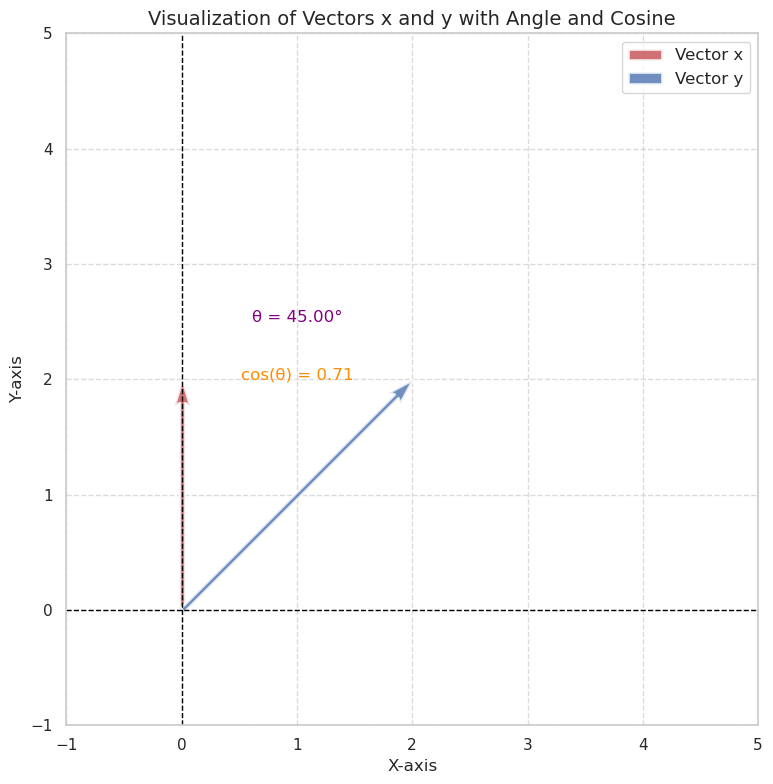

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vectors_with_cosine(x, y):
    """
    Plots two vectors in a 2D space, showing their angle, cosine of the angle, 
    and dot product value.

    Parameters:
        x (array-like): First vector.
        y (array-like): Second vector.
    """
    # Calculate dot product and cosine of the angle
    dot_product = np.dot(x, y)
    norm_x = np.linalg.norm(x)
    norm_y = np.linalg.norm(y)
    cos_theta = dot_product / (norm_x * norm_y)
    theta = np.arccos(cos_theta) * (180 / np.pi)  # Angle in degrees

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Set limits for the plot
    ax.set_xlim(-1, max(x[0], y[0]) + 3)
    ax.set_ylim(-1, max(x[1], y[1]) + 3)

    # Plot the vectors
    ax.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector x', linewidth=2, alpha=0.8)
    ax.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector y', linewidth=2, alpha=0.8)

    # Annotate the angle and cosine value
    mid_x = (x[0] + y[0]) / 2
    mid_y = (x[1] + y[1]) / 2
    ax.text(mid_x, mid_y + 0.5, f'θ = {theta:.2f}°', fontsize=12, ha='center', color='purple')
    ax.text(mid_x, mid_y, f'cos(θ) = {cos_theta:.2f}', fontsize=12, ha='center', color='darkorange')

    # Set grid and labels
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(0, color='black', linewidth=1, ls='--')
    ax.axvline(0, color='black', linewidth=1, ls='--')
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_title('Visualization of Vectors x and y with Angle and Cosine', fontsize=14)
    ax.set_aspect('equal')

    # Add legend
    plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

# Example usage
plot_vectors_with_cosine(np.array([0, 2]), np.array([2, 2]))
